# Ch 5 Applied Problems

## Problem 5
5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [1]:
import pandas as pd
import numpy as np
import patsy
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# statsmodels issue: https://github.com/statsmodels/statsmodels/issues/3931
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

sns.set(style="white")
%matplotlib inline

np.random.seed(1)

In [71]:
default = pd.read_csv("./data/Default.csv")
default['default_yes'] = (default['default'] == 'Yes').astype('int')
default.head()

,default,student,balance,income,default_yes
0,No,No,729.526495,44361.625074,0
1,No,Yes,817.180407,12106.134700,0
2,No,No,1073.549164,31767.138947,0
3,No,No,529.250605,35704.493935,0
4,No,No,785.655883,38463.495879,0


(a) Fit a logistic regression model that uses income and balance to predict default.

In [55]:
# (a) LR
X = default[['income', 'balance']].copy()
y = default['default_yes'].copy()

model = LogisticRegression()
model.fit(X,y)
print(f"SkLearn Coefs = {model.coef_}")

model_string = 'default_yes ~ income + balance'
result = smf.logit(formula=model_string, data=default).fit()
print(result.summary())

SkLearn Coefs = [[2.08089741e-05 5.64710265e-03]]
Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Jun 2025   Pseudo R-squ.:                  0.4594
Time:                        14:05:25   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000   

(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

- i. Split the sample set into a training set and a validation set.
- ii. Fit a multiple logistic regression model using only the training observations.
- iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.
- iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Com- ment on the results obtained.

In [56]:
states = [1, 2, 3]
for state in states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=state)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    y_preds_probs = model.predict_proba(X_test)[:,1]
    print(f"State {state} -> Validation Error = {1- accuracy_score(y_test, y_preds):.1%}")

State 1 -> Validation Error = 2.5%
State 2 -> Validation Error = 2.6%
State 3 -> Validation Error = 2.1%




(d) Now consider a logistic regression model that predicts the prob- ability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the val- idation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [57]:
default['student_binary'] = 1.0*(default['student'] == "Yes")
X['student'] = default['student_binary'].copy()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
y_preds_probs = model.predict_proba(X_test)[:,1]
print(f"Validation Error with Student= {1- accuracy_score(y_test, y_preds):.1%}")

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['student']), y, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
y_preds_probs = model.predict_proba(X_test)[:,1]
print(f"Validation Error without Student = {1- accuracy_score(y_test, y_preds):.1%}")


Validation Error with Student= 2.6%
Validation Error without Student = 2.5%


## Problem 6
We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coeffi- cients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM() function. Do not forget to set a random seed before beginning your analysis.

(a) Using the summarize() and sm.GLM() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [72]:
df = default[['income', 'balance', 'default_yes']]

model_string = 'default_yes ~ income + balance'
result = smf.logit(formula=model_string, data=df).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Jun 2025   Pseudo R-squ.:                  0.4594
Time:                        14:51:24   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

- Std Errors are very small < 10^-4

(b) Write a function, boot_fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [64]:
result.params

Intercept   -11.540468
income        0.000021
balance       0.005647
dtype: float64

In [75]:
def boot_fn(df, index_range):
    subset = df.iloc[index_range].copy()

    model_string = 'default_yes ~ income + balance'
    result = smf.logit(formula=model_string, data=subset).fit(disp=False)
    return result.params.balance, result.params.income

np.random.seed(0)
indices = np.random.choice(default.index, size=len(default), replace=True)
boot_fn(default, indices)

(0.005799490373833458, 2.1728365149007252e-05)

(c) Following the bootstrap example in the lab, use your boot_fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.


In [76]:
balances, incomes = [], []
samples = 1000

for i in range(samples):
    indices = np.random.choice(default.index, size=len(default), replace=True) # resample with replacement from entire dataset
    bootstrap_coefs = boot_fn(default, indices)
    balances.append(bootstrap_coefs[0])
    incomes.append(bootstrap_coefs[1])

print(f"Std Dev of Balance Coef = {np.std(np.array(incomes))}")
print(f"Std Dev of Income Coef = {np.std(np.array(balances))}")

Std Dev of Balance Coef = 4.713662380454344e-06
Std Dev of Income Coef = 0.0002362211215675502


(d) Comment on the estimated standard errors obtained using the sm.GLM() function and using the bootstrap.

- The results are not THAT different from the single sample ones above.

# Problem 8
We will now perform cross-validation on a simulated data set.
(a) Generate a simulated data set as follows: 
```
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
```
In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In this model n = 100, p is 2

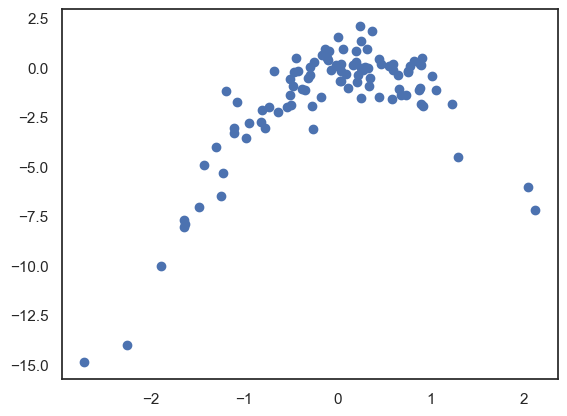

In [3]:
# (b) Create a scatterplot of X against Y . Comment on what you find.
plt.scatter(x,y)

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

i. $Y = \beta_0 + \beta_1X + ε$

ii.  $Y =β_0 +β_1X+β_2X^2 +ε$

iii. $Y =β_0 +β_1X+β_2X^2 +β_3X^3 +ε$

iv. $Y =β_0 +β_1X+β_2X^2 +β_3X^3 +β_4X^4 +ε$

Note you may find it helpful to use the data.frame() function to create a single data set containing both X and Y .

In [21]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
model = LinearRegression()
features = poly_features.fit_transform(df['x'].values.reshape(-1,1))
cv = cross_val_score(model, features, df['y'], scoring='neg_mean_squared_error', cv=len(df['x']))

In [23]:
cv

array([-3.29716907e-01, -9.76288703e-01, -1.74308245e-03, -5.31788317e-01,
       -1.85282082e+00, -2.29005536e-01, -6.94824456e-01, -2.08340590e+00,
       -3.47774395e+00, -8.17879175e-04, -3.88772098e-01, -5.78754402e-02,
       -2.06076393e-02, -8.70879216e-01, -8.65479670e-03, -1.21399707e-02,
       -4.21829002e-01, -2.92814370e-01, -1.00672339e+00, -5.49785432e-01,
       -2.62308624e+00, -2.20045403e+00, -6.16792091e+00, -5.65543676e-01,
       -1.49435917e+01, -1.13888600e+00, -1.44328384e+00, -4.34044542e-01,
       -5.94425363e-01, -1.86247469e-01, -6.20314334e-02, -3.45380713e-01,
       -1.22574209e-01, -3.29665439e-01, -6.62506047e-03, -5.78839145e-01,
       -7.15925089e-02, -9.51041207e-01, -7.43411132e-03, -1.12764334e+00,
       -1.17855887e+00, -2.35948747e+00, -3.03254947e-04, -8.09426266e-05,
       -3.47510132e-01, -1.22242867e-01, -2.45704255e-02, -2.40178562e-01,
       -1.46725631e-01, -1.16626575e+00, -8.65137692e-01, -3.05470057e-01,
       -9.50448433e-01, -

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def loo_cv(data, degree):
    poly_features = PolynomialFeatures(degree=degree)
    model = LinearRegression()
    features = poly_features.fit_transform(data['x'].values.reshape(-1,1))
    cv = cross_val_score(model, features, data['y'], scoring='neg_mean_squared_error', cv=len(data['x']))

    return -np.mean(cv)

# Set up data
df = pd.DataFrame({'x': x, 'y': y})
np.random.seed(10)  
cv_results = [loo_cv(df, deg) for deg in range(1, 5)]  
print(cv_results)

[6.633029839181984, 1.1229368563419693, 1.3017965489358856, 1.3323942694179336]


(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [24]:
df = pd.DataFrame({'x': x, 'y': y})
np.random.seed(405)  
cv_results = [loo_cv(df, deg) for deg in range(1, 5)]  
print(cv_results)

[6.633029839181984, 1.1229368563419693, 1.3017965489358856, 1.3323942694179336]


- We **do not** get different results with a different seed. This is because there's no randomness. Every time you're looking at every fold of n-1 data points.  5-fold would take 5 random selections, but n-1 doesn't.

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

- The lowest LOOCV error came from n=2, which includes a quadratic term. This makes sense, as we see an obvious quadratic relationship in our original scatter plot.

(f) Comment on the statistical significance of the coefficient esti- mates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [40]:
# Redo this with stats models. First engineer the features
df['x_2'] = df['x']**2
df['x_3'] = df['x']**3
df['x_4'] = df['x']**4
df['x_4'] = df['x']**4
model_strings = ['y~x','y~x+x_2','y~x+x_2+x_3','y~x+x_2+x_3+x_4']
results = []
for model in model_strings:
    results.append(smf.ols(formula=model, data=df).fit())

# Print out p values
print(results[-1].pvalues)

Intercept    4.596053e-01
x            2.591296e-05
x_2          2.396026e-19
x_3          6.424910e-01
x_4          2.310661e-02
dtype: float64


- As suspected, the p-values are significant for linear and quadratic terms and not significant for others except maybe x^4.